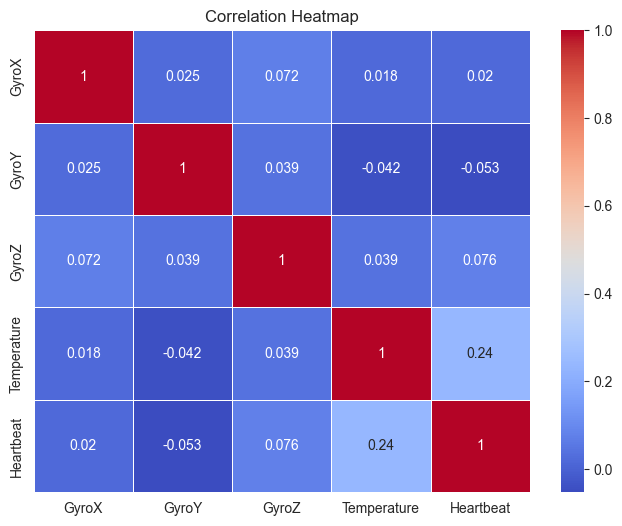

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# 데이터 로드
data_path = '../data/adl_fall_all.csv'
data = pd.read_csv(data_path)

# 변수 선택
variables = ['GyroX', 'GyroY', 'GyroZ', 'Temperature', 'Heartbeat']

# 데이터 상관관계 분석
correlation = data[variables].corr()

# 상관관계 히트맵 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


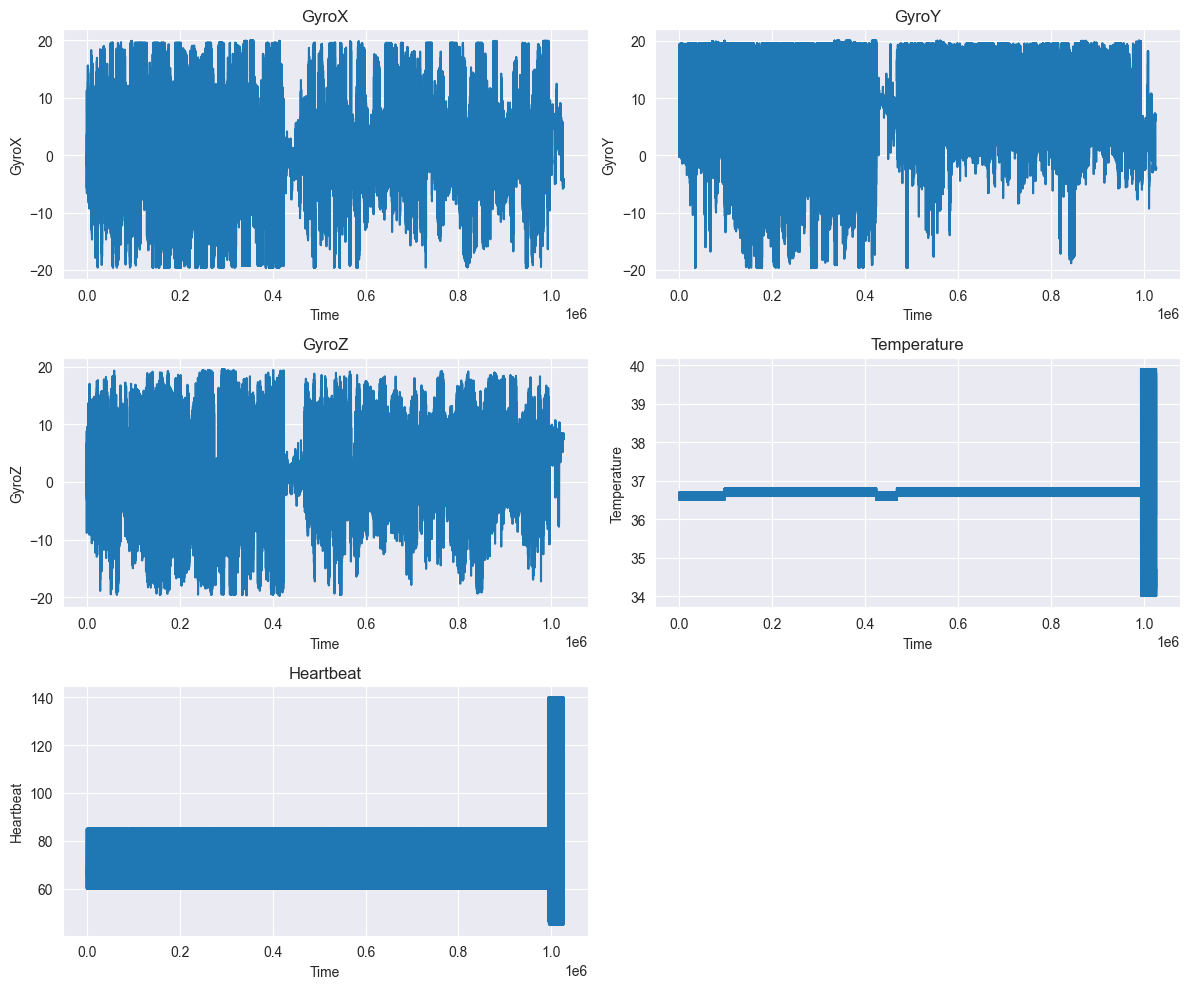

In [9]:
# 변수별 그래프 그리기
plt.figure(figsize=(12, 10))
for i, var in enumerate(variables):
    plt.subplot(3, 2, i+1)
    sns.lineplot(data=data, x='No', y=var)
    plt.title(var)
    plt.xlabel('Time')
    plt.ylabel(var)
plt.tight_layout()
plt.show()


In [10]:
def plot_activity(activity, data):
    fig, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(nrows=5, figsize=(15, 7), sharex=True)
    plot_axis(ax0, data['UserCode'], data['No'], data['GyroX'], 'X-Axis')
    plot_axis(ax1, data['UserCode'], data['No'], data['GyroY'], 'Y-Axis')
    plot_axis(ax2, data['UserCode'], data['No'], data['GyroZ'], 'Z-Axis')
    plot_axis(ax3, data['UserCode'], data['No'], data['Temperature'], 'Temperature')
    plot_axis(ax4, data['UserCode'], data['No'], data['Heartbeat'], 'Heartbeat')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.90)
    plt.show()

def plot_axis(ax, user, x, y, title):
  for i in range(len(x)-1):
    ax.plot([x.iloc[i], x.iloc[i+1]],[y.iloc[i], y.iloc[i+1]], color=u2c[user.iloc[i]])
  ax.set_title(title)
  ax.xaxis.set_visible(False)
  ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
  ax.set_xlim([min(x), max(x)])
  ax.grid(True)

In [11]:
from itertools import cycle

users = data['UserCode'].value_counts().index
colors = 'bckgmwry'
u2c = {k:v for (k, v) in zip(users, cycle(colors))}
u2c

{31: 'b',
 20: 'c',
 8: 'k',
 14: 'g',
 29: 'm',
 13: 'w',
 34: 'r',
 21: 'y',
 3: 'b',
 10: 'c',
 27: 'k',
 32: 'g',
 18: 'm',
 26: 'w',
 12: 'r',
 11: 'y',
 36: 'b',
 1: 'c',
 6: 'k',
 5: 'g',
 15: 'm',
 33: 'w',
 7: 'r',
 24: 'y',
 23: 'b',
 30: 'c',
 2: 'k',
 35: 'g',
 22: 'm',
 17: 'w',
 28: 'r',
 16: 'y',
 25: 'b',
 9: 'c',
 4: 'k'}

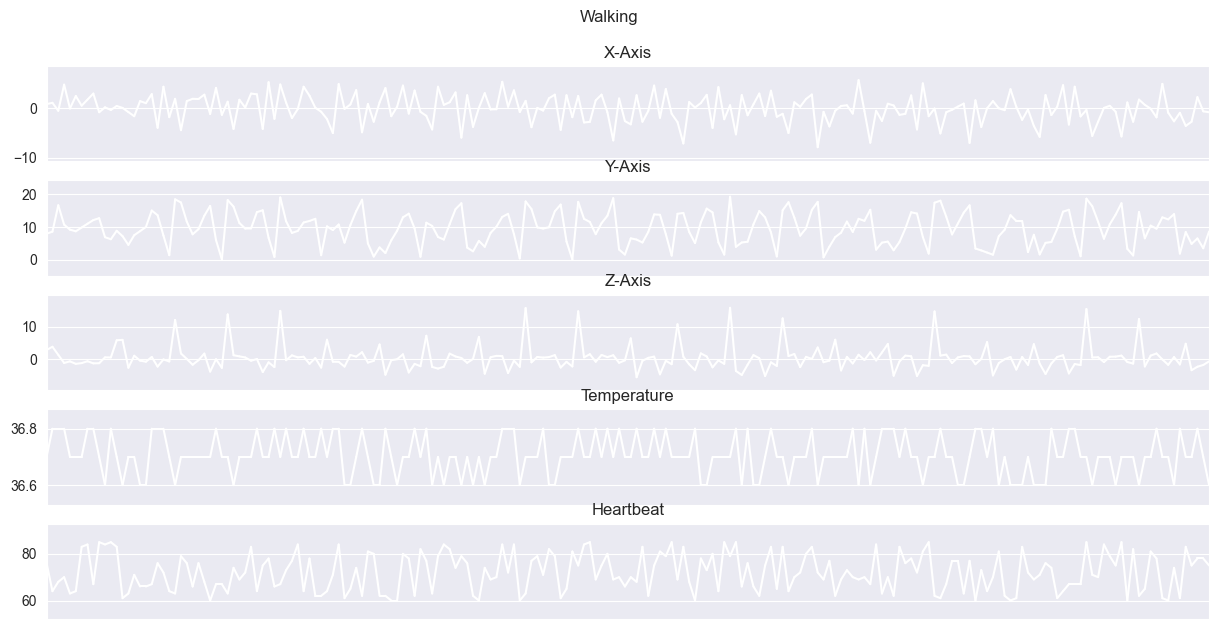

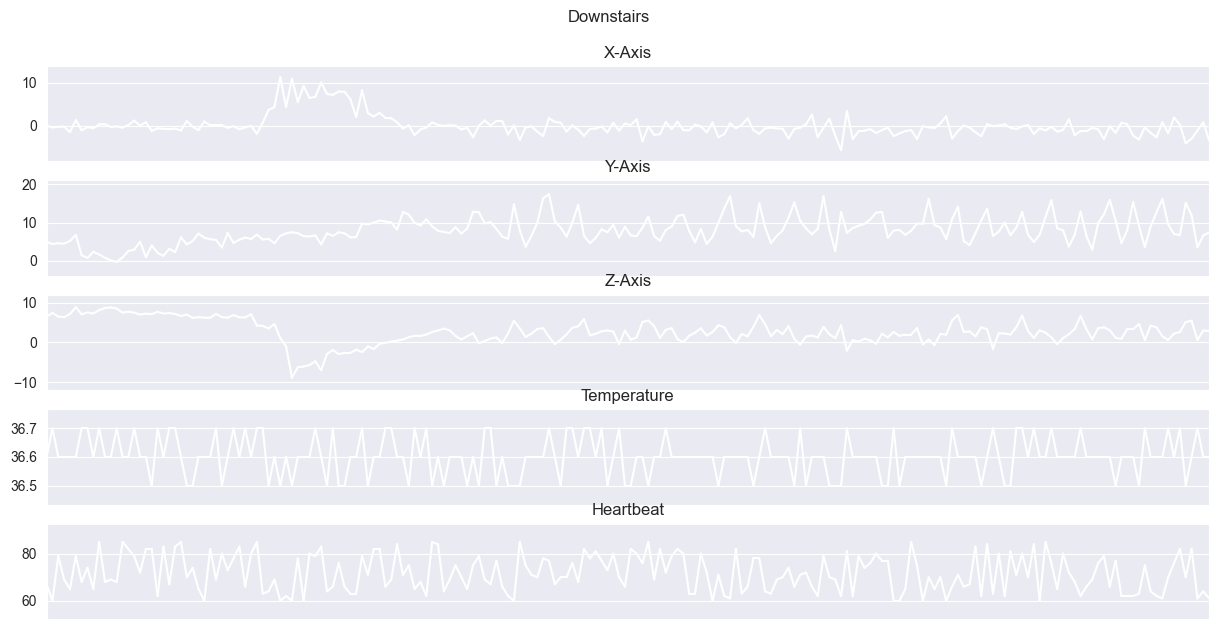

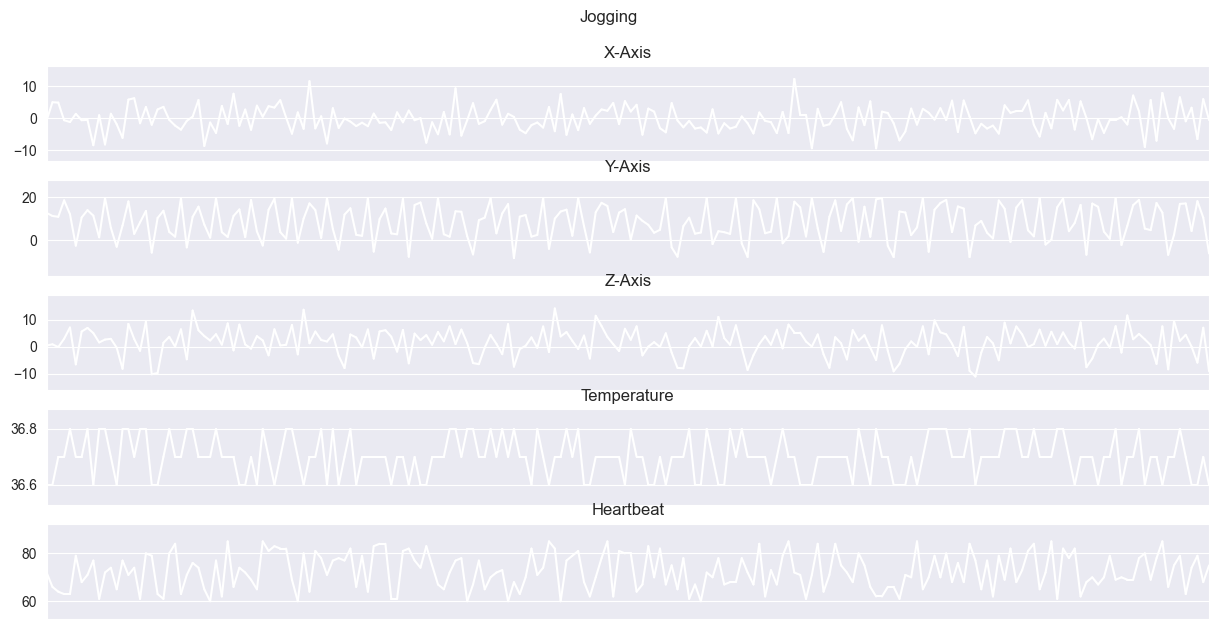

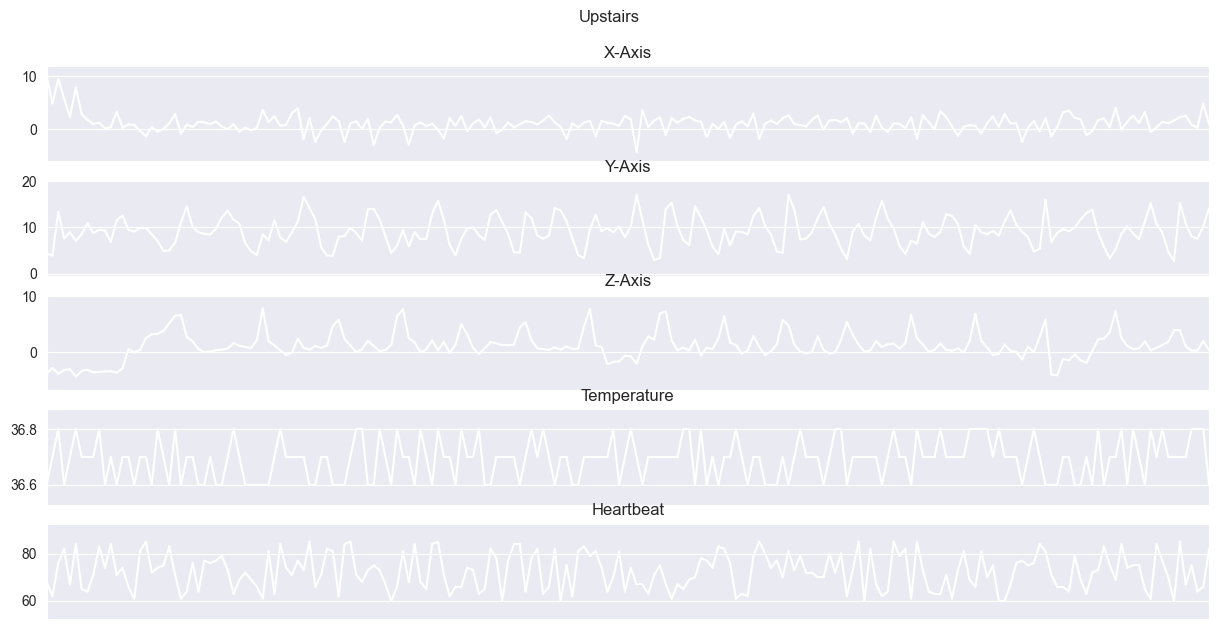

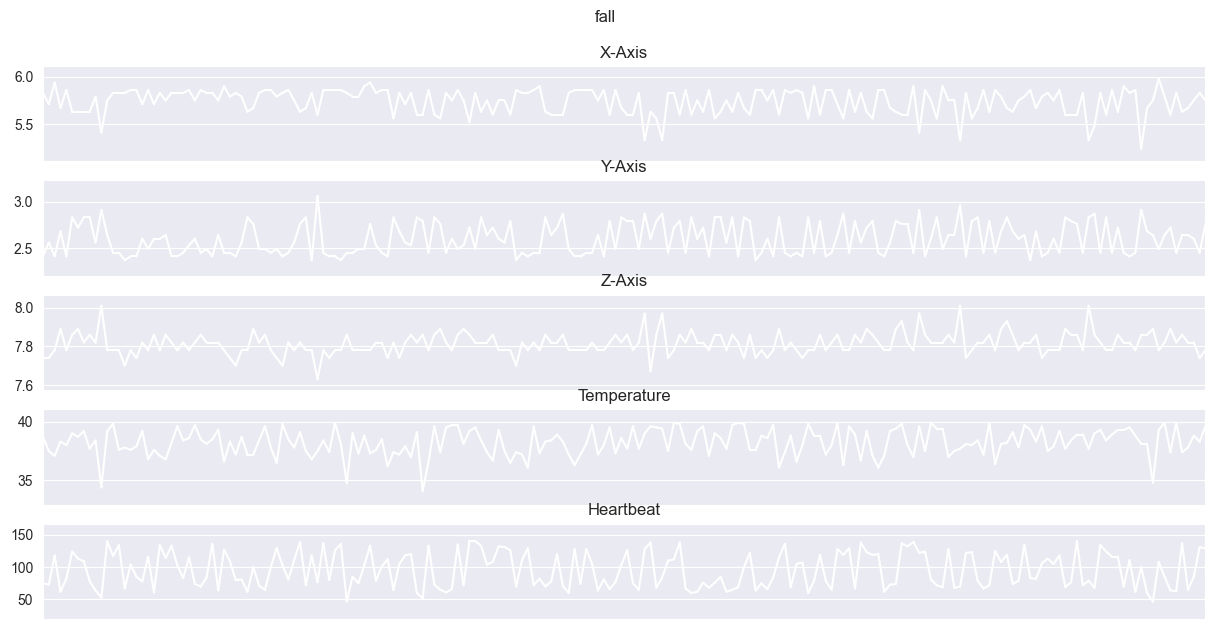

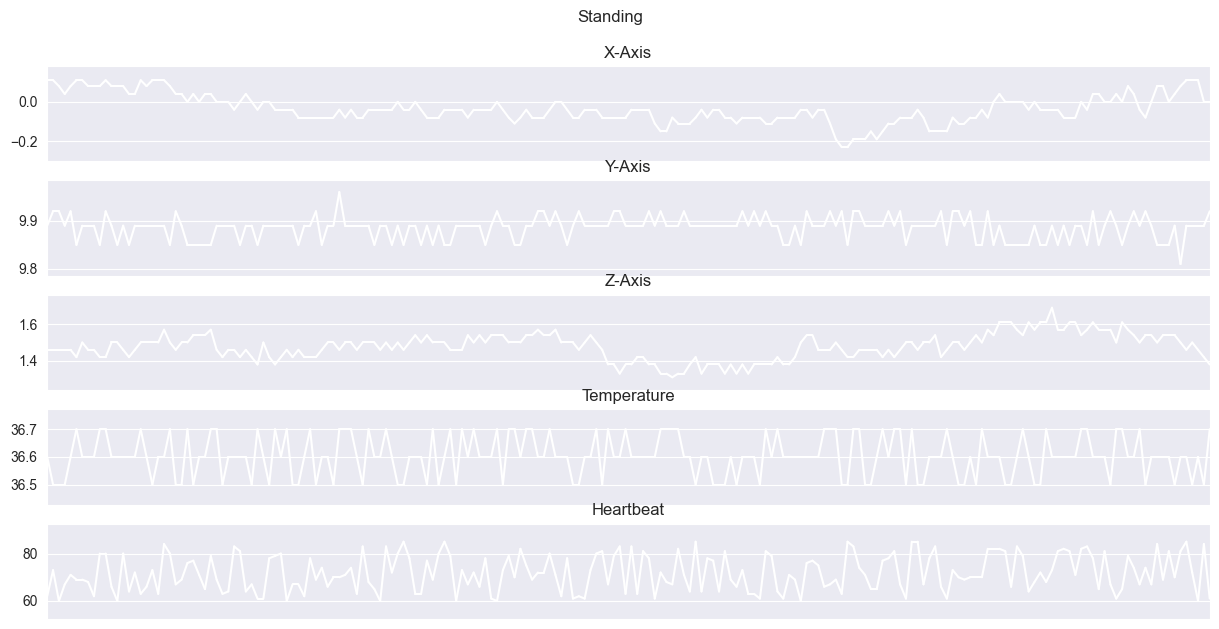

In [15]:
for activity in data[data['UserCode'] == 33]['Label'].value_counts().index:
    mask = (data['UserCode'] == 33) & (data['Label'] == activity)
    data_for_plot = data[mask][:200]
    plot_activity(activity, data_for_plot)

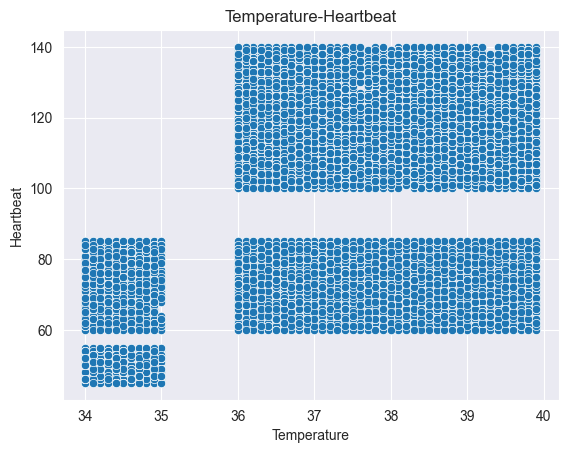

In [4]:
import seaborn as sns

sns.scatterplot(data=data, x='Temperature', y='Heartbeat')
plt.xlabel('Temperature')
plt.ylabel('Heartbeat')
plt.title('Temperature-Heartbeat')
plt.show()


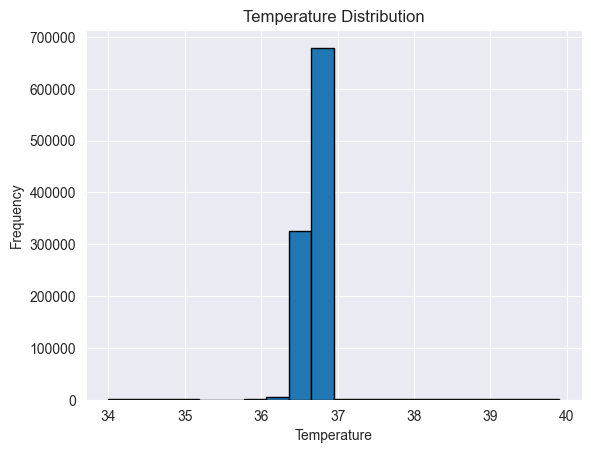

In [5]:
plt.hist(data['Temperature'], bins=20, edgecolor='black')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature Distribution')
plt.show()


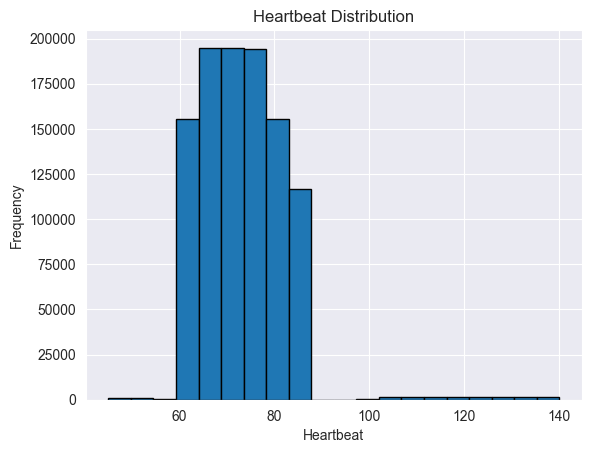

In [6]:
plt.hist(data['Heartbeat'], bins=20, edgecolor='black')
plt.xlabel('Heartbeat')
plt.ylabel('Frequency')
plt.title('Heartbeat Distribution')
plt.show()


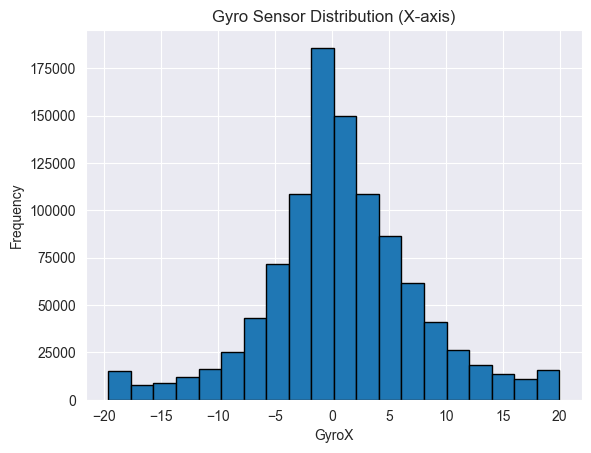

In [7]:
plt.hist(data['GyroX'], bins=20, edgecolor='black')
plt.xlabel('GyroX')
plt.ylabel('Frequency')
plt.title('Gyro Sensor Distribution (X-axis)')
plt.show()


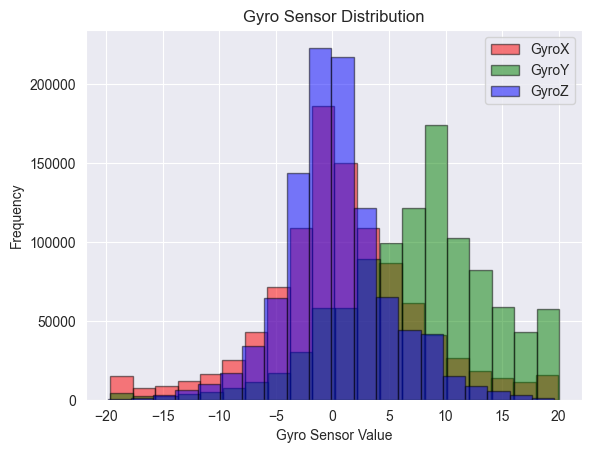

In [8]:
plt.hist(data['GyroX'], bins=20, edgecolor='black', color='red', alpha=0.5, label='GyroX')
plt.hist(data['GyroY'], bins=20, edgecolor='black', color='green', alpha=0.5, label='GyroY')
plt.hist(data['GyroZ'], bins=20, edgecolor='black', color='blue', alpha=0.5, label='GyroZ')
plt.xlabel('Gyro Sensor Value')
plt.ylabel('Frequency')
plt.title('Gyro Sensor Distribution')
plt.legend()
plt.show()
